# HOUSE PRICE PREDICTION 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sb

# DATA READING

In [2]:
house = pd.read_csv("C:/Users/ritik/Downloads/data.csv")
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# NULL VALUES HANDLING

In [5]:
house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
house.value_counts("price")

price
0.0           49
300000.0      42
400000.0      31
600000.0      29
440000.0      29
              ..
510250.0       1
511000.0       1
511500.0       1
511555.0       1
26590000.0     1
Length: 1741, dtype: int64

In [7]:
house.loc[house.price==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


In [8]:
house.loc[house.bedrooms>=6]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
92,2014-05-05 00:00:00,8.230000e+05,6.0,1.75,2920,5000,2.5,0,0,4,2780,140,1908,0,125 29th Ave,Seattle,WA 98122,USA
122,2014-05-05 00:00:00,2.280000e+06,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,WA 98053,USA
170,2014-05-06 00:00:00,4.750000e+05,6.0,3.00,3470,117612,1.5,0,0,3,3470,0,1924,2011,19007 80th Ave NE,Kenmore,WA 98028,USA
241,2014-05-07 00:00:00,5.999990e+05,9.0,4.50,3830,6988,2.5,0,0,3,2450,1380,1938,2003,8809 Densmore Ave N,Seattle,WA 98103,USA
252,2014-05-07 00:00:00,3.200000e+06,7.0,4.50,6210,8856,2.5,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4301,2014-07-10 00:00:00,8.800000e+05,6.0,2.50,2640,3680,2.0,0,0,5,1760,880,1922,1956,3008 38th Ave SW,Seattle,WA 98126,USA
4341,2014-05-08 00:00:00,3.750000e+05,6.0,2.25,3206,5793,2.0,0,0,3,3206,0,2012,1912,25921-25929 35th Pl S,Kent,WA 98032,USA
4357,2014-05-05 00:00:00,0.000000e+00,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4509,2014-06-18 00:00:00,0.000000e+00,6.0,3.00,3020,13783,2.0,0,0,3,3020,0,1952,2002,4115 85th Ave SE,Mercer Island,WA 98040,USA


In [9]:
house.loc[house.bedrooms==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


In [10]:
house =house[house['bedrooms'] !=0]

In [11]:
house.loc[house.bedrooms==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [12]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [13]:
house =house[house['bedrooms'] <6]

In [14]:
house.loc[house.bedrooms<=6]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [15]:
house.loc[house.bedrooms>=6]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [16]:
house=house.drop(["date"],axis=1)

In [17]:
house=house.drop(["street"],axis=1)


In [18]:
house=house.drop(["city"],axis=1)


In [19]:
house=house.drop(["statezip"],axis=1)


In [20]:
house=house.drop(["country"],axis=1)

In [21]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

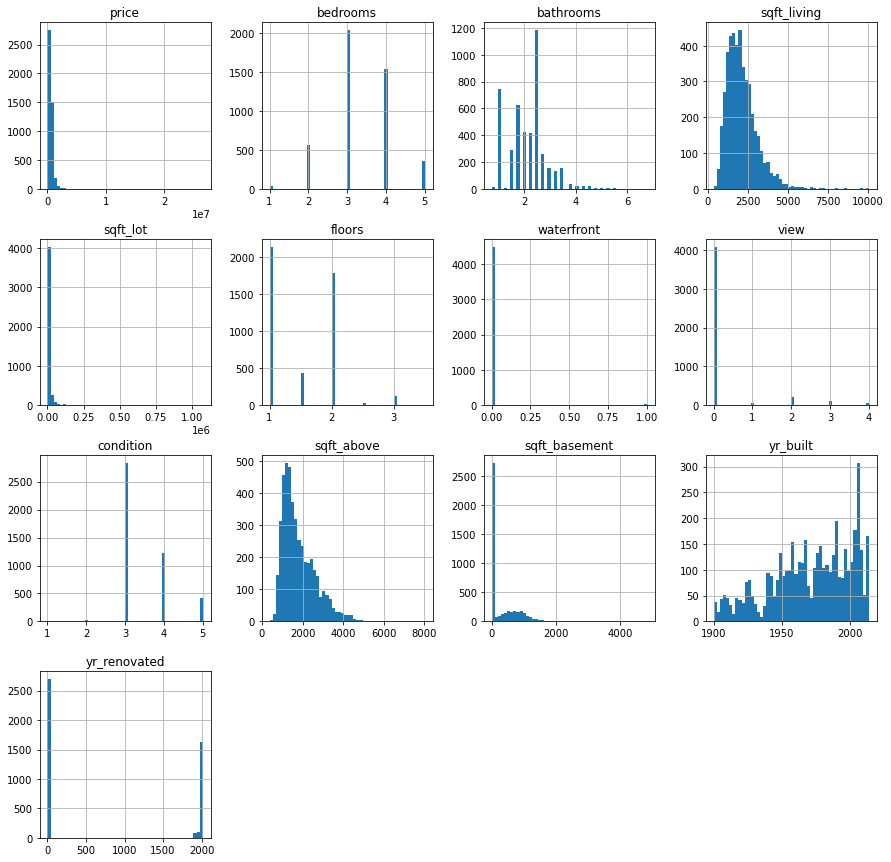

In [22]:
house.hist(figsize=(15,15),bins=50)

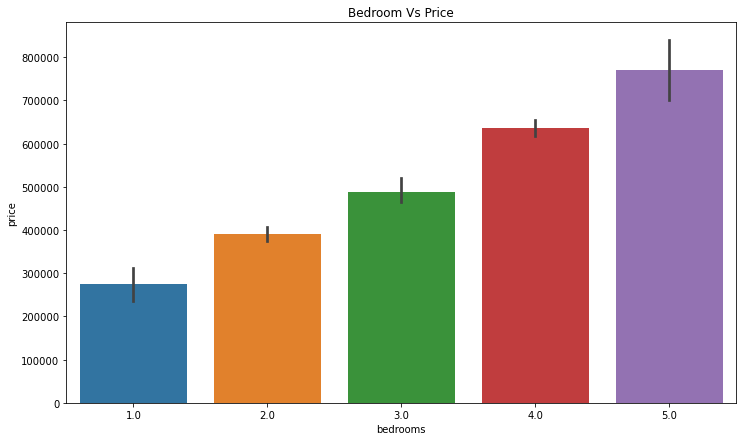

In [23]:
mat.figure(figsize=(12,7))
sb.barplot(x = house['bedrooms'], y = house['price'])
mat.title('Bedroom Vs Price')
mat.show()

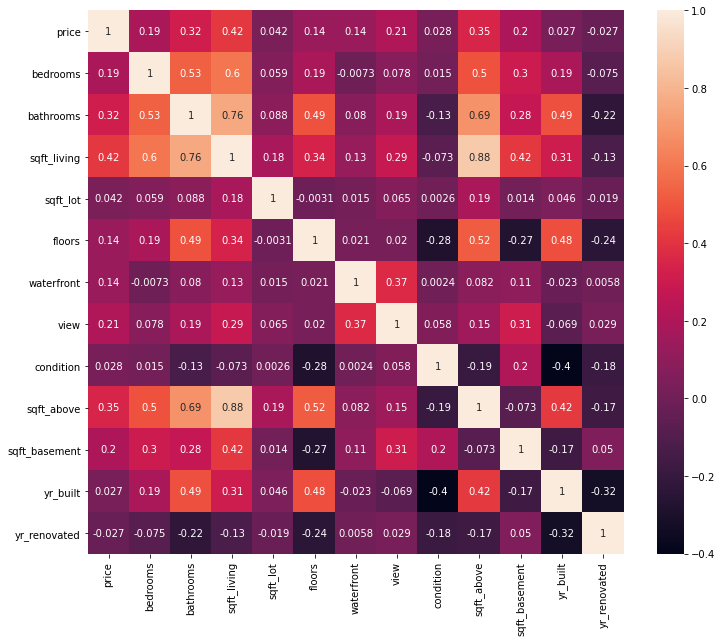

In [24]:
mat.figure(figsize=(12,10))
sb.heatmap(house.corr(),annot=True)
mat.show()

In [25]:
house.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.191754,0.318468,0.418706,0.041671,0.140280,0.138595,0.211814,0.027861,0.353133,0.200180,0.026790,-0.027137
bedrooms,0.191754,1.000000,0.530498,0.596787,0.059259,0.186295,-0.007305,0.078067,0.014759,0.495095,0.300761,0.185980,-0.074805
bathrooms,0.318468,0.530498,1.000000,0.758759,0.088289,0.493166,0.080314,0.192660,-0.129659,0.686650,0.275095,0.487031,-0.224957
sqft_living,0.418706,0.596787,0.758759,1.000000,0.183965,0.341516,0.126397,0.287954,-0.072511,0.875071,0.418650,0.305373,-0.127285
sqft_lot,0.041671,0.059259,0.088289,0.183965,1.000000,-0.003060,0.015406,0.064696,0.002620,0.194817,0.013530,0.046097,-0.019268
floors,0.140280,0.186295,0.493166,0.341516,-0.003060,1.000000,0.020732,0.020485,-0.280835,0.520941,-0.273745,0.480975,-0.241041
waterfront,0.138595,-0.007305,0.080314,0.126397,0.015406,0.020732,1.000000,0.367877,0.002427,0.081914,0.106753,-0.023303,0.005825
view,0.211814,0.078067,0.192660,0.287954,0.064696,0.020485,0.367877,1.000000,0.057684,0.152192,0.307789,-0.069089,0.029421
condition,0.027861,0.014759,-0.129659,-0.072511,0.002620,-0.280835,0.002427,0.057684,1.000000,-0.188053,0.203438,-0.401139,-0.182910
sqft_above,0.353133,0.495095,0.686650,0.875071,0.194817,0.520941,0.081914,0.152192,-0.188053,1.000000,-0.073190,0.424220,-0.166181


In [26]:
house.corr(method='spearman')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.334139,0.490734,0.629207,0.073409,0.317250,0.082102,0.260776,0.017125,0.530217,0.230533,0.091638,-0.074259
bedrooms,0.334139,1.000000,0.528372,0.646066,0.240019,0.223122,-0.011433,0.073651,-0.001177,0.531233,0.229237,0.179281,-0.061167
bathrooms,0.490734,0.528372,1.000000,0.744642,0.087323,0.545478,0.048621,0.152450,-0.172852,0.695477,0.176692,0.547295,-0.219769
sqft_living,0.629207,0.646066,0.744642,1.000000,0.324256,0.397028,0.070759,0.236144,-0.072461,0.842174,0.311521,0.334991,-0.133440
sqft_lot,0.073409,0.240019,0.087323,0.324256,1.000000,-0.204347,0.093090,0.107589,0.092030,0.304050,0.019011,-0.017245,0.053596
floors,0.317250,0.223122,0.545478,0.397028,-0.204347,1.000000,0.019463,0.012038,-0.309265,0.603120,-0.296655,0.549048,-0.235437
waterfront,0.082102,-0.011433,0.048621,0.070759,0.093090,0.019463,1.000000,0.275792,0.003805,0.052258,0.057760,-0.026048,0.001779
view,0.260776,0.073651,0.152450,0.236144,0.107589,0.012038,0.275792,1.000000,0.058456,0.141046,0.263434,-0.086640,0.030564
condition,0.017125,-0.001177,-0.172852,-0.072461,0.092030,-0.309265,0.003805,0.058456,1.000000,-0.189712,0.199973,-0.435724,-0.236523
sqft_above,0.530217,0.531233,0.695477,0.842174,0.304050,0.603120,0.052258,0.141046,-0.189712,1.000000,-0.185208,0.471437,-0.175075


In [27]:
op=pd.read_csv("C:/Users/ritik/Downloads/output.csv")

In [28]:
op=op.drop(["date"],axis=1)

In [29]:
op=op.drop(["street"],axis=1)

In [30]:
op=op.drop(["city"],axis=1)

In [31]:
op=op.drop(["statezip"],axis=1)

In [32]:
op=op.drop(["country"],axis=1)

In [33]:
x_test=op.drop(["price"],axis=1)
y_test=op["price"]

In [34]:
x_train=house.drop(["price"],axis=1)
y_train=house["price"]

In [ ]:
x_train.head()

In [36]:
y_train.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

# random forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

# fitting the model
forest = RandomForestRegressor(n_estimators=50, max_features='auto')
print(forest)
forest.fit(x_train,y_train)

# Evaluvating the score of the model
print("Score on training data:", forest.score(x_train,y_train))


RandomForestRegressor(n_estimators=50)
Score on training data: 0.83293467847752


In [38]:
y_train_pred = forest.predict(x_train)

In [39]:
c=pd.DataFrame({"actual":y_train,'predict':y_train_pred})
c.head()

,actual,predict
0,313000.0,3.513110e+05
1,2384000.0,2.137000e+06
2,342000.0,3.679581e+05
3,420000.0,4.202175e+05
4,550000.0,4.566780e+05


In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_train,y_train_pred)

0.83293467847752

In [42]:
forest.score(x_test,y_test)

0.8208403786344964

In [49]:
from sklearn.model_selection import cross_val_score
cs = cross_val_score(forest,x_train,y_train,cv=10)

In [50]:
cs


array([ 0.3942449 ,  0.47988344,  0.46199225,  0.45622251,  0.48571809,
       -1.23334313,  0.43684818,  0.30709948,  0.49792573, -0.04529552])

In [52]:
cs.mean()

0.22412959185588982